In [1]:
from keras.models import load_model, save_model
import numpy as np
from matplotlib import pyplot as plt
import gzip
import sys
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
def extract_labels(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * num_images)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        return labels
test_labels = extract_labels('/home/nikita/git/mnist_autoencoder/mnist_dataset/t10k-labels-idx1-ubyte.gz',10000)


In [4]:
def extract_data(filename, num_images):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(28 * 28 * num_images)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(num_images, 28,28)
        return data
test_data = extract_data('/home/nikita/git/mnist_autoencoder/mnist_dataset/t10k-images-idx3-ubyte.gz', 10000)


In [5]:
test_data = test_data.reshape(-1, 28,28, 1)
np.max(test_data)
test_data = test_data / np.max(test_data)
np.max(test_data)
test_Y_one_hot = to_categorical(test_labels)

In [6]:
full_model = load_model('/home/nikita/git/mnist_autoencoder/autoencoder_classifier_complete.h5')

In [7]:
test_eval = full_model.evaluate(test_data, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

predicted_classes = full_model.predict(test_data)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

predicted_classes.shape, test_labels.shape


Test loss: 0.07437291459218728
Test accuracy: 0.9896000027656555


((10000,), (10000,))

Found 9894 correct labels


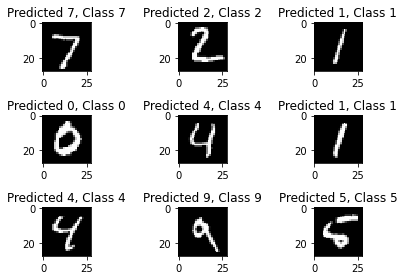

In [8]:
correct = np.where(predicted_classes==test_labels)[0]
print("Found %d correct labels"%len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_labels[correct]))
    plt.tight_layout()


Found 106 incorrect labels


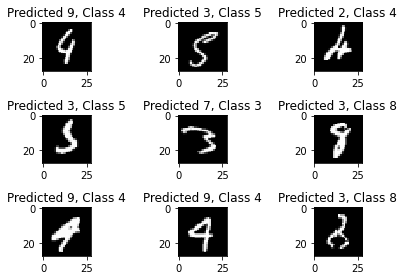

In [9]:
incorrect = np.where(predicted_classes!=test_labels)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate (incorrect[:9]) :
    plt.subplot(3,3,i+1)
    plt.imshow(test_data[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_labels[incorrect]))
    plt.tight_layout()
